In [12]:
import numpy as np
import pandas as pd
import networkx as nx
import csv
import matplotlib.pyplot as plt
import collections
import re

# Berlin Center

In [27]:
datalocation = 'RoadsData/berlin-center_net.txt'
name = re.findall("(.*)[.]",datalocation)[0]
my_data = np.genfromtxt(datalocation, skip_header = 9, comments=";")

RoadsData/berlin-center_net


In [4]:
with open(name + '.csv', 'w') as csvfile:
    for items in my_data:
        csvfile.write(str(items[0]) + "," 
                      + str(items[1]) + ","
                      + str(items[2]) + "," 
                      + str(items[3]) + ","
                      + str(items[4]) + "," 
                      + str(items[5]) + ","
                      + str(items[6]) + "," 
                      + str(items[7]) + ","
                      + str(items[8]) + ","
                      + str(items[9]) + "," 
                      + "\n")

In [5]:
def read_graph(file_path):

    g = nx.DiGraph()
    file = open(file_path,'r')
    
    for line in file:
        split = line.split(',')
        n1 = int(float(split[0].strip()))
        n2 = int(float(split[1].strip()))
        capacity = float(split[2].strip())
        length = float(split[3].strip())
        free_flow_time = float(split[4].strip())
        b = float(split[5].strip())
        power = float(split[6].strip())
        speed_limit = float(split[7].strip())
        toll = float(split[8].strip())
        edge_type = float(split[9].strip())
        
        if n1 not in g.nodes():
            g.add_node(n1, color = 'b', size = 50)
        
        if n2 not in g.nodes():
            g.add_node(n2,color='b', size=50)
        
        g.add_edge(n1,
                   n2,
                   capacity=capacity,
                   length=length, 
                   free_flow_time=free_flow_time,
                   b=b,
                   power=power,
                   speed_limit=speed_limit,
                   toll=toll,
                   edge_type=edge_type)
            
    file.close()
    return g

In [6]:
berlin_center_g = read_graph(name + '.csv')

In [7]:
print("# of nodes: %d" % berlin_center_g.number_of_nodes())
print("# of edges: %d" % berlin_center_g.number_of_edges())
print("# of selfloops: %d" % berlin_center_g.number_of_selfloops())
print("Random cycle in G:")
print(nx.find_cycle(berlin_center_g))
print("G is a DAG: %s" % nx.is_directed_acyclic_graph(berlin_center_g))
print("G is a tree: %s" % nx.is_tree(berlin_center_g))
print("G's density: %1.2f%%" % (100 * nx.density(berlin_center_g))) #density = number_of_edges / max_theoretical_number_of_edges
print("G's reciprocity: %1.2f%%" % (100 * nx.reciprocity(berlin_center_g))) #Reciprocity: share of connections going both ways in directed graph
print("G's clustering coefficient = %s" % nx.transitivity(berlin_center_g))
print("G is a strongly connected graph: %s" % nx.is_strongly_connected(berlin_center_g))
print("G is a weakly connected graph: %s" % nx.is_weakly_connected(berlin_center_g))

g_comps = nx.weakly_connected_components(berlin_center_g)
g_comp_nodes = next(g_comps)
g_comp = berlin_center_g.subgraph(g_comp_nodes)
print("# of nodes: %d" % len(g_comp.nodes()))

# of nodes: 12981
# of edges: 28370
# of selfloops: 0
Random cycle in G:
[(1, 11000), (11000, 1)]
G is a DAG: False
G is a tree: False
G's density: 0.02%
G's reciprocity: 48.64%
G's clustering coefficient = 0.21585039033673825
G is a strongly connected graph: False
G is a weakly connected graph: True
# of nodes: 12981


### Degree Histogram

In [8]:
# Replace "GRAPH" with graph of interest throughout.
def degree(GRAPH):
    degree_sequence = sorted([d for n, d in GRAPH.degree()], reverse=True)  # degree sequence
    # print "Degree sequence", degree_sequence
    degreeCount = collections.Counter(degree_sequence)
    deg, cnt = zip(*degreeCount.items())

    fig, ax = plt.subplots()
    plt.bar(deg, cnt, width=0.80, color='b')

    plt.title("Degree Histogram")
    plt.ylabel("Count")
    plt.xlabel("Degree")
    ax.set_xticks([d + 0.4 for d in deg])
    ax.set_xticklabels(deg)

    # draw graph in inset
    plt.axes([0.4, 0.4, 0.5, 0.5])
    Gcc = sorted(nx.weakly_connected_component_subgraphs(GRAPH), key=len, reverse=True)[0]
    pos = nx.spring_layout(GRAPH)
    plt.axis('off')
    nx.draw_networkx_nodes(GRAPH, pos, node_size=20)
    nx.draw_networkx_edges(GRAPH, pos, alpha=0.4)

    plt.show()

C:\IntelPython3\lib\site-packages\networkx\drawing\layout.py:499: RuntimeWarning: invalid value encountered in sqrt
  distance = np.sqrt((delta**2).sum(axis=0))


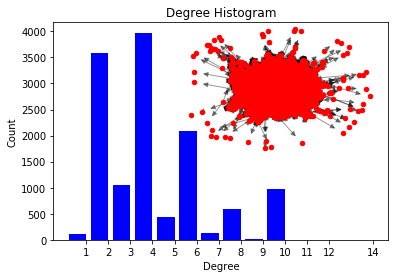

In [9]:
degree(berlin_center_g)

### Avg Node Connectivity

In [10]:
nx.average_node_connectivity(berlin_center_g)

KeyboardInterrupt: 